 ECOLE NATIONALE DE LA STATISTIQUE ET DE L'ANALYSE ECONOMIQUE PIERRE NDIAYE     
        COURS DE STATISTIQUES EXPLORATOIRE ET SPATIALE - ISE1_CYCLE LONG          
                        ENSEIGNANT: MR HEMA                                     
                  TP5_GOOGLE EARTH ENGINE AVEC PYTHON                            
                 MEMBRES: FOGWOUNG DJOUFACK SARAH-LAURE                         
                          NGUEMFOUO NGOUMTSA CELINA                            
                          NIASS AHMADOU                                       
                          SENE MALICK          


Consigne du TP :

    - Importer le fichier csv Points_data envoyé sur GitHub
    - Compter le nombre de points par admin
    - Créer un raster qui regroupe les différents points
    - Visualiser le raster sous forme de catégories 


In [1]:
############   STEP1: Importation des packages   ############

import ee  # c'est la bibliothèque Python qui permet d'accéder à l'API de Google Earth Engine
import geemap # Elle permet de créer et visualiser des cartes interactives basées sur des données GEE.
import pandas as pd # Elle permet la manipulation et l’analyse généralement pour des données tabulaires
from folium.plugins import Draw
import os
from ipywidgets import VBox, HTML
from ipyleaflet import WidgetControl
import matplotlib.pyplot as plt

# Authentification et initialisation Google Earth Engine
ee.Authenticate()  # Ceci permet de gérer le processus d'authentification pour accéder à Google Earth Engine.
ee.Initialize()   # Initialise l'instance Earth Engine pour permettre certaines opérations qu'on fera par la suite

print("DONE") # Juste pour savoir quand ca aura finit d'éxecuter 

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


DONE


In [2]:
############   STEP2: Importation fichier csv et visualisation ############
Donnees = ee.FeatureCollection("projects/ee-senemalick123450/assets/Points_data")
    # Affichage de la première ligne pour voir comment c'est organisé
# Définir le répertoire de travail
repertoire_de_travail = 'C:/Users/DELL/Desktop/ISEP3/Statistique ES/Niger'  # Remplacez par le chemin de votre répertoire
os.chdir(repertoire_de_travail)

# Importer un fichier CSV dans ce répertoire
data = pd.read_csv("Points_data.csv")

print(Donnees.first().getInfo())
    # Créeons une carte interactive centrée sur l'Afrique de l'Ouest pour mieux visualiser les données
Map = geemap.Map(center=[14.693, -17.445], zoom=4) 
    # Ajoutons la FeatureCollection à la carte
Map.addLayer(Donnees.style(**{'color': 'blue', 'pointSize': 5}), {}, 'Donnees Evenements')
Map # Affichage

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-7.499998394146455, 6.41669992512126]}, 'id': '000000000000000137d3', 'properties': {'actor1': 'Military Forces of France (1995-2007)', 'actor2': 'Private Security Forces (Ivory Coast)', 'admin1': 'Montagnes', 'admin2': 'Cavally', 'admin3': 'Guiglo', 'assoc_actor_1': '', 'assoc_actor_2': '', 'civilian_targeting': '', 'country': 'Ivory Coast', 'disorder_type': 'Political violence', 'event_date': '08 March 2003', 'event_id_cnty': 'CDI470', 'event_type': 'Battles', 'fatalities': 0, 'geo_precision': 1, 'inter1': 'External/Other forces', 'inter2': 'External/Other forces', 'interaction': 'External/Other forces-External/Other forces', 'iso': 384, 'location': 'Moyen-Cavally', 'notes': 'French troops attacked in Duekoue', 'region': 'Western Africa', 'source': 'Guardian (United Kingdom)', 'source_scale': 'International', 'sub_event_type': 'Armed clash', 'tags': '', 'time_precision': 1, 'timestamp': 1665530124, 'year': 2003}}


Map(center=[14.693, -17.445], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

In [3]:
# Filtrer les données pour ne garder que les événements au Niger
data_niger = data[data['country'] == 'Niger']

# Compter le nombre total de points au Niger (vérification globale)
nombre_total_points = len(data_niger)

# Compter le nombre de points par niveau administratif
# Par admin1 (région)
points_par_admin1 = data_niger.groupby('admin1').size().reset_index(name='Nombre de Points')

# Par admin2 (département)
points_par_admin2 = data_niger.groupby('admin2').size().reset_index(name='Nombre de Points')

# Par admin3 (commune)
points_par_admin3 = data_niger.groupby('admin3').size().reset_index(name='Nombre de Points')

# Afficher les résultats
print("Nombre de points par admin1 (région) :")
print(points_par_admin1)

# Calculer la somme des points pour chaque niveau administratif
somme_points_admin1 = points_par_admin1['Nombre de Points'].sum()
somme_points_admin2 = points_par_admin2['Nombre de Points'].sum()
somme_points_admin3 = points_par_admin3['Nombre de Points'].sum()

# Afficher les résultats
print(f"Nombre total de points au Niger : {nombre_total_points}")
print(f"Somme des points par admin1 (région) : {somme_points_admin1}")
print(f"Somme des points par admin2 (département) : {somme_points_admin2}")
print(f"Somme des points par admin3 (commune) : {somme_points_admin3}")

# Exporter les résultats en CSV
points_par_admin1.to_csv("points_par_admin1_niger.csv", index=False)
points_par_admin2.to_csv("points_par_admin2_niger.csv", index=False)
points_par_admin3.to_csv("points_par_admin3_niger.csv", index=False)

print("\nLes fichiers CSV des points par niveau administratif ont été exportés avec succès.")


Nombre de points par admin1 (région) :
      admin1  Nombre de Points
0     Agadez               392
1      Diffa              1160
2      Dosso               145
3     Maradi               398
4     Niamey               259
5     Tahoua               323
6  Tillaberi              1695
7     Zinder                65
Nombre total de points au Niger : 4437
Somme des points par admin1 (région) : 4437
Somme des points par admin2 (département) : 4437
Somme des points par admin3 (commune) : 4437

Les fichiers CSV des points par niveau administratif ont été exportés avec succès.


############   STEP4: Création d'un raster avec les différents points ############

Pour créer notre raster, nous allons d'abord ajouter une propriété count à chaque point, ce qui permettra de compter chaque événement. Ensuite, nous filtrerons ces points pour ne garder que ceux situés au Niger. Nous allons ensuite transformer ces points en un raster en utilisant la fonction reduceToImage(), où chaque pixel représente la somme des événements dans une zone donnée, avec une taille de pixel de 5 km. Enfin, nous afficherons ce raster sur une carte interactive pour visualiser la répartition des événements à travers le Niger.

In [4]:
pays = ee.FeatureCollection("projects/ee-senemalick123450/assets/geoBoundaries-NER-ADM0")

# Ajouter une propriété numérique "count" à chaque point
Comptage_points = Donnees.map(lambda feature: feature.set('count', 1))

# Filtrer les points pour le Niger
Points_niger = Comptage_points.filter(ee.Filter.eq('country', 'Niger'))

# Créer le raster à partir des points du Niger
raster_niger = Points_niger.reduceToImage(
    properties=["count"],  # Utiliser la propriété numérique "count"
    reducer=ee.Reducer.sum()  # Réduction par somme
).reproject(
    crs="EPSG:4326",  # Système de projection WGS84
    scale=5000  # Résolution de 5 km
)

# Découper le raster avec les limites du shapefile 'pays' (qui représente le Niger)
raster_clipped_niger = raster_niger.clip(pays)


In [5]:
# Les caractéristiques du raster créé
print("Informations détaillées du raster :", raster_clipped_niger.getInfo())

Informations détaillées du raster : {'type': 'Image', 'bands': [{'id': 'sum', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -9.223372036854776e+18, 'max': 9.223372036854776e+18}, 'crs': 'EPSG:4326', 'crs_transform': [0.04491576420597607, 0, 0, 0, -0.04491576420597607, 0]}]}


In [6]:
# Calculer les statistiques du raster (max, min, total)
stats = raster_clipped_niger.reduceRegion(
    reducer=ee.Reducer.minMax(),
    geometry=pays, 
    scale=5000, 
    maxPixels=1e8
).getInfo()

# Afficher les résultats
print("Nombre maximal de points dans un pixel : ", stats['sum_max'])
print("Nombre minimal de points dans un pixel : ", stats['sum_min'])

Nombre maximal de points dans un pixel :  254
Nombre minimal de points dans un pixel :  0


In [7]:
# Ajouter le raster découpé au Map pour visualisation
Map = geemap.Map()
Map.centerObject(pays, zoom=6)
# Palette de couleurs linéaire du bleu (petites valeurs) au rouge (grandes valeurs)
palette_couleur = ['#00008B', '#0000FF', '#00BFFF', '#00FF00', '#FFFF00', '#FFD700', '#FF6347', '#FF0000']


Map.addLayer(raster_clipped_niger, {
   'min': 0, 
    'max': 20, 
   'palette': palette_couleur
}, "Raster 5km - Niger (Clipped)")
Map.addLayer(pays, {'color': 'black'}, "Frontières du Niger")
Map

Map(center=[17.413175629395553, 9.346513612635333], controls=(WidgetControl(options=['position', 'transparent_…

La partie suivante vise à visualiser les données de densité d'événements sous forme de catégories
en fonction des terciles calculés directement à partir des valeurs min et max.
 Étapes suivies :
1. Définition des terciles :
    - Les terciles sont calculés en divisant l'intervalle des valeurs (0 à 30) en trois parties égales.
      - Tier1 : 1er tercile correspondant aux valeurs faibles (aucune situation grave).
      - Tier2 : 2ème tercile correspondant aux valeurs modérées (situation modérée).
      - Au-delà de Tier2 : situation critique.
 
 2. Catégorisation des pixels :
    - Les pixels sont reclassés en trois catégories à l'aide de la méthode `expression` :
      - 1 : Aucune situation grave (valeurs inférieures ou égales à Tier1).
      - 2 : Situation modérée (valeurs entre Tier1 et Tier2).
      - 3 : Situation critique (valeurs supérieures à Tier2).
 

In [8]:
# Définir les terciles en fonction des valeurs min et max
min_value = 0
max_value = 30

tier1 = min_value + (max_value - min_value) / 3  # 1er tercile
tier2 = min_value + 2 * (max_value - min_value) / 3  # 2ème tercile

# Afficher les terciles pour vérification
print(f"Terciles calculés - Tier1 : {tier1}, Tier2 : {tier2}")

# Fonction pour reclasser les pixels en catégories basées sur les terciles
def categoriser_terciles(raster, tier1, tier2):
    return raster.expression(
        "(b('sum') <= tier1) ? 1 : " +                 # 1 : Aucune situation grave
        "(b('sum') > tier1 && b('sum') <= tier2) ? 2 : " +  # 2 : Situation modérée
        "3",                                          # 3 : Crise
        {
            'sum': raster, 
            'tier1': tier1, 
            'tier2': tier2
        }
    )

# Appliquer la classification par terciles sur le raster
raster_categorise_terciles = categoriser_terciles(raster_clipped_niger, tier1, tier2)

# Découper l'image catégorisée aux frontières du Niger
raster_categorise_terciles_clipped = raster_categorise_terciles.clip(pays)  

# Paramètres de visualisation des terciles
vis_params_terciles = {
    'min': 1,
    'max': 3,
    'palette': ['green', 'yellow', 'red']  # Vert : Aucune situation grave, Jaune : Situation modérée, Rouge : Crise
}

# Charger la carte
Map_terciles = geemap.Map(center=[13.5116, 2.1254], zoom=6)
Map_terciles.addLayer(raster_categorise_terciles_clipped, vis_params_terciles, "Situation par Terciles")

# Ajouter une légende
legend_html = """
    <div style='padding: 10px; background-color: white; border-radius: 5px;'>
        <h4>Catégories (Terciles)</h4>
        <p style='margin: 0'><span style='color: green;'>⬤</span> Aucune situation grave</p>
        <p style='margin: 0'><span style='color: yellow;'>⬤</span> Situation modérée</p>
        <p style='margin: 0'><span style='color: red;'>⬤</span> Crise</p>
    </div>
"""
legend_widget = HTML(value=legend_html)
legend_control = WidgetControl(widget=legend_widget, position="topright")
Map_terciles.add_control(legend_control)

# Afficher la carte
Map_terciles


Terciles calculés - Tier1 : 10.0, Tier2 : 20.0


Map(center=[13.5116, 2.1254], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

In [9]:
#########################  REPRESENTATION SUIVANT LA CATEGORIE "DISORDER_TYPE" POUR LE NIGER #########################

# Filtrer les points en fonction des catégories de 'disorder_type' et du pays 'Niger'
categorie_developpements_strategiques = Donnees.filter(
    ee.Filter.And(
        ee.Filter.eq('disorder_type', 'Strategic developments'),
        ee.Filter.eq('country', 'Niger')
    )
)
categorie_violence_politique = Donnees.filter(
    ee.Filter.And(
        ee.Filter.eq('disorder_type', 'Political violence'),
        ee.Filter.eq('country', 'Niger')
    )
)
categorie_manifestations = Donnees.filter(
    ee.Filter.And(
        ee.Filter.eq('disorder_type', 'Demonstrations'),
        ee.Filter.eq('country', 'Niger')
    )
)

# Compter le nombre de points dans chaque catégorie pour le Niger
print("Tableau des effectifs par catégorie pour le Niger :")
print("Développements stratégiques :", categorie_developpements_strategiques.size().getInfo())
print("Violence politique :", categorie_violence_politique.size().getInfo())
print("Manifestations :", categorie_manifestations.size().getInfo())

# Créer la carte et centrer sur le Niger
Map = geemap.Map()
Map.centerObject(pays, zoom=6)

# Ajouter les points pour chaque catégorie avec une couleur spécifique
Map.addLayer(categorie_developpements_strategiques, {'color': 'blue'}, "Développements stratégiques")
Map.addLayer(categorie_violence_politique, {'color': 'red'}, "Violence politique")
Map.addLayer(categorie_manifestations, {'color': 'yellow'}, "Manifestations")

# Ajouter les frontières du Niger pour contexte
Map.addLayer(pays, {'color': 'black'}, "Frontières du Niger")

# Afficher la carte
Map


Tableau des effectifs par catégorie pour le Niger :
Développements stratégiques : 1212
Violence politique : 2885
Manifestations : 338


Map(center=[17.413175629395553, 9.346513612635333], controls=(WidgetControl(options=['position', 'transparent_…

In [10]:
# Palette de couleurs pour les événements
palette_evenements = ['lightblue', 'yellow', 'orange']

# Initialisation de la carte
Map = geemap.Map(center=[13.5116, 2.1254], zoom=6)  # Centrer sur le Niger
Map.addLayer(pays, {'color': 'black'}, "Frontières du Niger")  # Ajouter les frontières du Niger

# Étape 1 : Identifier les années uniques dans les données
annees = data['year'].unique()

# Initialiser une liste pour stocker le total d'événements par année
totaux_par_annee = []

# Étape 2 et 3 : Créer un raster de densité pour chaque année et calculer le total des événements
for annee in annees:
    # Filtrer les événements pour l'année en cours
    data_annee = Donnees.filter(ee.Filter.eq('year', int(annee)))
    
    # Créer un raster de densité
    raster_annee = data_annee.reduceToImage(
        properties=['timestamp'],  # Utiliser une propriété valide pour identifier les événements
        reducer=ee.Reducer.count()  # Compter les événements dans chaque pixel
    ).reproject(
        crs='EPSG:4326',  # Système de coordonnées géographiques
        scale=5000  # Résolution de 5 km
    )
    
    # Découper le raster pour ne conserver que la zone du Niger
    raster_clipped = raster_annee.clip(pays)
    
    # Calculer le total des événements (somme des pixels du raster)
    total_evenements = raster_clipped.reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=pays.geometry(),  # Clip uniquement sur le Niger
        scale=5000,
        maxPixels=1e13
    ).get('count').getInfo()  # "count" correspond à la bande par défaut
    
    # Ajouter le total à la liste
    totaux_par_annee.append(total_evenements)
    
    # Visualiser le raster sur la carte pour l'année en cours
    Map.addLayer(
        raster_clipped,
        {'min': 0, 'max': 30, 'palette': palette_evenements},
        f"Événements {annee}"
    )

# Supprimer les couches des types d'evenement puiquq'on a demandé de visualiser dans distinguer les évenements
if 'Developpements_strategiques' in Map.layers:
    Map.remove_layer(Map.layers['Developpements_strategiques'])
if 'violence_politique' in Map.layers:
    Map.remove_layer(Map.layers['violence_politique'])
if 'Manifestations' in Map.layers:
    Map.remove_layer(Map.layers['Manifestations'])

# Ajouter une légende
legend_html = """
    <div style='padding: 10px; background-color: white; border-radius: 5px;'>
        <h4>Densité des Événements</h4>
        <p style='margin: 0'><span style='color: lightblue;'>⬤</span> Faible</p>
        <p style='margin: 0'><span style='color: yellow;'>⬤</span> Modérée</p>
        <p style='margin: 0'><span style='color: orange;'>⬤</span> Élevée</p>
    </div>
"""
legend_widget = HTML(value=legend_html)
legend_control = WidgetControl(widget=legend_widget, position="topright")
Map.add_control(legend_control)

# Afficher la carte
Map


Map(center=[13.5116, 2.1254], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

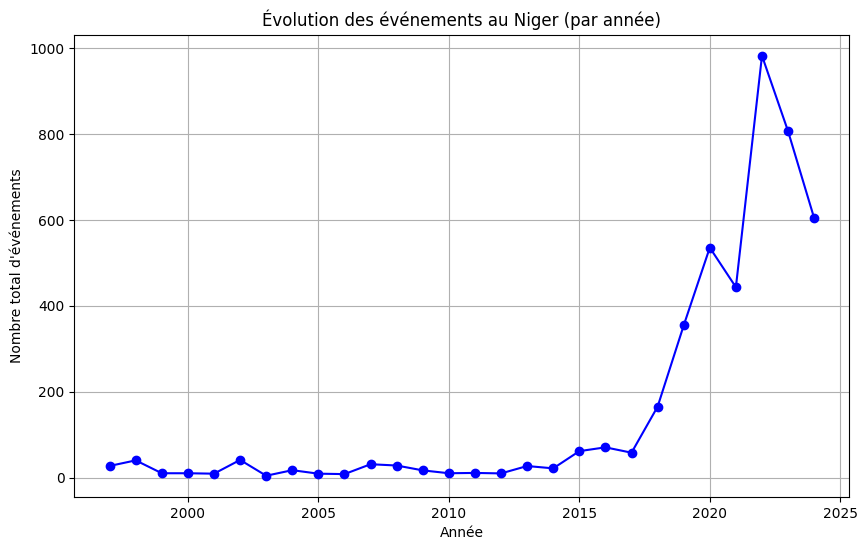

In [11]:
# Étape 4 : Tracer l'évolution des événements au fil des années
plt.figure(figsize=(10, 6))
plt.plot(annees, totaux_par_annee, marker='o', linestyle='-', color='b')
plt.title("Évolution des événements au Niger (par année)")
plt.xlabel("Année")
plt.ylabel("Nombre total d'événements")
plt.grid(True)
plt.show()

